In [1]:
import numpy as np
import pandas as pd

**Load data**

In [2]:
ltc = pd.read_csv('../data/bc_ltc_final.csv')
odhf = pd.read_excel('../data/odhf_ltc.xlsx')

In [3]:
ltc[ltc.latitude.isnull()]

,FACILITY_NAME,Number of dead,HCC_CODE,HLTH_AUTH,STREET_ADDRESS,CITY,POSTAL,PHONE,OPEN_DATE,COUNCIL,...,INFRACTIONS_OTHER,outbreak_status,point,latitude,longitude,residents_council,family_council,accreditation,home_type,years_operating
55,Chetwynd Hospital and Health Centre,0.0,922CD,Northern Health,5500 Hospital road,Chetwynd,V0C1J0,(250) 788-2236,1971,No Councils,...,0.0,no,NaN,NaN,NaN,no,no,yes,health_authority,49.0
57,Columbia Garden Village,0.0,93DHA,Interior Health,"800-10 Ave., Box 578",Invermere,V0A1K0,(250) 341-3350,2005,Resident Council,...,0.0,no,NaN,NaN,NaN,yes,no,yes,for-profit,15.0
58,Columbia House - Invermere District Hospital,0.0,915C7,Interior Health,1030 - 10th Street,Invermere,V0A1K0,(250) 342-2329,1994,"Resident Council, Family Council",...,0.0,no,NaN,NaN,NaN,yes,yes,yes,health_authority,26.0
62,Cormorant Island Health Centre,0.0,9A72D,Vancouver Island Health,49 School Road,Alert Bay,V0N1A0,(250) 974-5585,2000,Resident & Family Council (combined),...,0.0,no,NaN,NaN,NaN,yes,yes,yes,health_authority,20.0
68,Czorny Alzheimer Centre,0.0,9327A,Fraser Health,16850 66th Avenue,Surrey,V3S5M1,(604) 575-6700,2007,No Councils,...,0.0,no,NaN,NaN,NaN,no,no,unknown,health_authority,13.0
77,Dr. F. W. Green Memorial Home,0.0,98F1A,Interior Health,1700 4th Street St. South,Cranbrook,V1C6E1,(250) 426-3710,1979,Family Council,...,0.0,no,NaN,NaN,NaN,no,yes,yes,health_authority,41.0
96,Fleetwood Place,0.0,993E2,Fraser Health,16011 83rd Ave,Surrey,V4N0N2,(604) 590-6860,2004,"Resident Council, Family Council",...,0.0,no,NaN,NaN,NaN,yes,yes,yes,for-profit,16.0
107,Gillis House,0.0,9AAGI,Interior Health,1699 Tutill Court,Merritt,V1K1C6,(250) 378-3271,1981,"Resident Council, Family Council",...,0.0,no,NaN,NaN,NaN,yes,yes,yes,health_authority,39.0
114,Greenwoods,0.0,99DD4,Vancouver Island Health,133 Blain Road,Salt Spring Island,V8K1Z9,(250) 537-5561,1979,"Family Council, Advisory Council",...,0.0,no,NaN,NaN,NaN,no,yes,yes,non-profit,41.0
123,Heritage Square,0.0,9BI83,Interior Health,3904 27th St.,Vernon,V1T4X7,(250) 545-2060,2004,Resident & Family Council (combined),...,0.0,no,NaN,NaN,NaN,yes,yes,yes,for-profit,16.0


In [4]:
odhf_bc = odhf[odhf['province'] == 'bc']

In [5]:
odhf_bc.columns

Index(['index', 'facility_name', 'source_facility_type', 'odhf_facility_type',
       'provider', 'unit', 'street_no', 'street_name', 'postal_code', 'city',
       'province', 'source_format_str_address', 'CSDname', 'CSDuid', 'Pruid',
       'latitude', 'longitude'],
      dtype='object')

In [6]:
ltc['facility_name'] = ltc.FACILITY_NAME.str.lower()

**Correct some name discrepancies in odhf**

In [7]:
def rightsplit(x):
    hold = x.split('ó')
    try:
        return hold[1].lstrip()
    except IndexError:
        return hold[0]
    
    
odhf_bc['facility_name'] = odhf_bc.facility_name.map(lambda x: rightsplit(x))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
odhf_bc.facility_name

115                 harmony court care centre
116                              echo village
117                          fir park village
118                           all care canada
119                  amherst private hospital
                        ...                  
305                            westview place
306                        william rudd house
307                    willingdon care centre
308    wrinch memorial hospital extended care
309                    yaletown house society
Name: facility_name, Length: 195, dtype: object

**Merge**

In [9]:
ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'outer')

In [10]:
print("merge: {}, odhf_bc: {}, ltc: {}".format(len(ltc_odhf), len(odhf_bc), len(ltc)))

merge: 379, odhf_bc: 195, ltc: 297


**How many facilities are in odhf are not in the ltc data?**

In [11]:
missing = list(set(odhf_bc.facility_name.unique()) - set(ltc.facility_name.unique()))
len(missing)

82

**How many facilities are in the ltc csv are not in the odhf?**

In [12]:
missing2 = list(set(ltc.facility_name.unique()) - set(odhf_bc.facility_name.unique()))
len(missing2)
# missing2

184

In [13]:
odhf_bc.facility_name.replace({'bradley centre': 'bradley center',
                             'parkview place enderby': 'parkview place',
                             'dr. andrew pavilion' : 'dr. andrew pavilion - summerland health centre',
                             'priory (hiscock & heritage woods)' : 'the priory - heritage woods',
                              'st vincentís: brock fahrni' : 'st. vincent\'s - brock fahrni pavilion',
                              'pine grove care centre' : 'pine grove seniors community',
                             'the views' : 'the views - st. joseph\'s general hospital',
                             'fort langley seniors village' : 'fort langley seniors community',
                             'selkirk place' : 'selkirk seniors village',
                             'kiwanis lodge' : 'kiwanis village lodge',
                             'brandtís creek mews' : 'brandt\'s creek mews',
                              'hilton villa care centre' : 'hilton villa seniors community',
                              'bevan lodge' : 'bevan village',
                              'discovery harbour care centre' : 'discovery harbour seniors community',
                              'the cascades' : 'the cascades care community',
                             'eagle park health care centre': 'eagle park health care facility',
                             'cottage-worthington pavilion' : 'cottage and worthington pavilions - msa hospital',
                             'evergreen baptist care home' : 'evergreen - the terraces / the pointe',
                             'elim village' : 'elim village - the harrison / harrison west',
                              'purdy pavilion' : 'purdy pavilion - ubc hospital',
                             'lake country lodge ltd.' : 'lake country lodge',
                             'eagle ridge manor' : 'eagle ridge manor - port moody',
                             'shorncliffe intermediate care facility' : 'shorncliffe',
                             'burnaby fair haven' : 'fair haven - burnaby',
                             'gateby intermediate care facility' : 'the gateby',
                             'wrinch memorial hospital extended care' : 'wrinch memorial hospital',
                             'sunridge place' : 'sunridge place seniors community',
                             'mountain view manor' : 'mountain view manor - delta hospital',
                             'vancouver fair haven' : 'fair haven - vancouver',
                             'cartier house' : 'cartier house seniors community',
                             'minto house' : 'minto house - arrow lakes hospital',
                             'queenís park care centre' : 'queen\'s park care centre',
                             'the madison' : 'the madison care centre',
                             'langley memorial hospital residential services':'Langley Memorial Hospital ECU'.lower(),
                             'polson':'polson residential care - vernon jubilee hospital',
                             'peace portal lodge' : 'peace portal seniors village',
                             'gateway lodge' : 'gateway lodge residential care',
                             'powell river general hospital evergreen extended care unit' : 'Evergreen Extended Care - Powell River Hospital'.lower(),
                             'mariposa lodge' : 'mariposa gardens',
                             'haro park centre society' : 'haro park centre',
                             'oyster harbour care centre' : 'oyster harbour seniors community',
                             'yaletown house society' : 'yaletown house',
                             'stanford place': 'stanford seniors village',
                             'wexford creek' :'wexford creek seniors community',
                             'mckinney place' : 'McKinney Place - South Okanagan General Hospital'.lower(),
                             'kinsmen place lodge': 'kinsmen lodge',
                             'jackson house' : 'Jackson House - Ashcroft Hospital and Health Centre'.lower(),
                             'brookhaven extended care unit and chronic behavior disorder unit' : 'brookhaven care centre',
                             'chetwynd multilevel care unit' : 'chetwynd hospital and health centre',
                             'banfield pavilion' : 'Banfield Pavilion - Vancouver General Hospital'.lower(),
                             'piccadilly care centre' : 'piccadilly seniors community',
                             'kiwanis care centre new westminster' : 'kiwanis care centre',
                             'sunnybank retirement centre' : 'sunnybank retirement home',
                             'poplar ridge pavilion' : 'Poplar Ridge Pavilion - Kootenay Boundary Hospital'.lower(),
                             'st vincentís: langara' : 'st. vincent\'s - langara',
                             'the heights at mt. view' : 'the heights at mount view',
                             'overlander extended care hospital' : 'overlander residential care',
                             'st. michaelís centre' : 'st. michael\'s centre',
                             'mill site lodge and fischer place' : 'fischer place/mill site lodge',
                             'langley gardens retirement community' : 'langley gardens',
                             'peace arch hospital residential care' : 'Hogg and Weatherby Pavilions - Peace Arch Hospital'.lower(),
                             'spring valley care centre' : 'spring valley seniors community',
                             'cerwydden care' : 'cerwydden seniors community',
                             'kiwanis care centre north vancouver' : 'berkley care centre',
                              'sherwood crescent manor' : 'sherwood crescent manor - the oxford'}, inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
# ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'inner')
missing2 = list(set(odhf_bc.facility_name.unique()) - set(ltc.facility_name.unique()))
print("length :", len(missing2), missing2)

length : 18 ['sherwood crescent manor - the oxford', 'the hamlets at vernon', 'anderson manor', 'vjh - chronic behaviour disorder unit', 'steveston residence', 'amherst private hospital', 'island health', 'evergreen hamlets', 'cariboo memorial hospital - residential beds', 'lynn valley lodge', 'highland lodge', 'the oxford', 'the salvation army sunset lodge', 'retirement concepts', 'westview place', 'burquitlam lions care centre', 'all care canada', 'false creek residence']


**Merge again**

In [15]:
ltc_odhf = pd.merge(ltc, odhf_bc, on = 'facility_name', how = 'outer')
print("merge: {}, odhf_bc: {}, ltc: {}".format(len(ltc_odhf), len(odhf_bc), len(ltc)))

merge: 316, odhf_bc: 195, ltc: 297


### Clean

**Drop completely null columns**

In [16]:
ltc_odhf.dropna(axis=1, how = 'all', inplace = True)

**Complete missing information where possible**

* Number of dead = 0
* outbreak_status = 'No'

In [17]:
ltc_odhf['Number of dead'].fillna(0, inplace = True)
ltc_odhf['outbreak_status'].fillna('no', inplace = True)

 * Drop unneccessary cols

In [18]:
ltc_odhf.drop(columns = ['FACILITY_NAME', 'index'], inplace = True)

* Fill `CITY` (from ltc data, 20 are missing) with `city` (from odhf, only 20 are filled) then drop `city`
* Fill `POSTAL_CODE` with `postal_code` and drop

In [19]:
# CITY
ltc_odhf.CITY.fillna(ltc_odhf.city, inplace = True)

#POSTAL_CODE
ltc_odhf.POSTAL.fillna(ltc_odhf.postal_code, inplace = True)
ltc_odhf.drop(columns = ['postal_code', 'city'], inplace = True)

* Fill `HLTH_AUTH` by city

In [20]:
# create a dictionary of health auths and cities
HA_dict = {k: g["CITY"].unique().tolist() for k,g in ltc_odhf.groupby("HLTH_AUTH")}

# if na's exist in HEALTH_AUTH, return the key for the city value
def get_key(val): 
    try:
        for key, value in HA_dict.items(): 
            for v in value:
                 if v == val: 
                    return key
    except KeyError:
        print(val, "not assigned")

def health_auth(df):
    for entry in df[df.HLTH_AUTH.isnull()].CITY:
        print(entry)
        return get_key(entry.title())
        
        

In [21]:
health_auth(ltc_odhf)

sidney


'Vancouver Island Health'

In [22]:
HA_tofill = health_auth(ltc_odhf)
ltc_odhf.HLTH_AUTH.fillna(HA_tofill, inplace = True)

sidney


In [23]:
ltc_odhf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 315
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number of dead           316 non-null    float64
 1   HCC_CODE                 298 non-null    object 
 2   HLTH_AUTH                316 non-null    object 
 3   STREET_ADDRESS           298 non-null    object 
 4   CITY                     316 non-null    object 
 5   POSTAL                   316 non-null    object 
 6   PHONE                    298 non-null    object 
 7   OPEN_DATE                289 non-null    object 
 8   COUNCIL                  291 non-null    object 
 9   ACCRED_STATUS            298 non-null    object 
 10  BEDS_PRIVATE             298 non-null    float64
 11  BEDS_PUBLIC              298 non-null    float64
 12  BEDS_TOTAL               298 non-null    float64
 13  ROOMS_PRIVATE            298 non-null    float64
 14  ROOMS_SEMI               2

### Investigate missing homes 

In [24]:
ltc_odhf[ltc_odhf.STREET_ADDRESS.isnull()].facility_name.tolist()

['all care canada',
 'amherst private hospital',
 'anderson manor',
 'burquitlam lions care centre',
 'cariboo memorial hospital - residential beds',
 'evergreen hamlets',
 'the hamlets at vernon',
 'highland lodge',
 'island health',
 'lynn valley lodge',
 'false creek residence',
 'steveston residence',
 'retirement concepts',
 'sherwood crescent manor - the oxford',
 'the oxford',
 'the salvation army sunset lodge',
 'vjh - chronic behaviour disorder unit',
 'westview place']

LTC | Reason for removal
----|--------
amherst private hospital | hospital
burquitlam lions care centre | [closed](https://www.tricitynews.com/news/funding-for-burquitlam-lions-care-centre-ends-next-summer-1.2043040)
cariboo memorial hospital - residential beds | hospital
'vjh - chronic behaviour disorder unit' | hospital
island health | not found
lynn valley lodge | not a formal LTC [article](https://lynnvalleylife.com/blog/lynn-valley-masons-welcome-others-to-join-lodge/)
retirement concepts | is an organization for several LTCs, which seem to already be included
false creek residence | residence for independent living
steveston residence | residence for independent living

LTC | Source of info
-----|-------------
anderson manor | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/160)
the hamlets at vernon | [IH pdf](https://www.interiorhealth.ca/AboutUs/MediaCentre/NewsReleases/Documents/Construction%20begins%20on%20new%20Vernon%20residential%20care%20home.pdf)
kiwanis care centre north van - ***name change*** | [article](http://www.vch.ca/about-us/news/news-releases/kiwanis-care-centre-celebrates-20-years-and-a-new-name-berkley-care-centre)
highland lodge | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/22)
salvation army sunset lodge | [bc.gov](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/index/184)
sherwood crescent manor / the oxford | are the same [1](https://www.health.gov.bc.ca/ccf/survey/index.php/displayfacility/bycommunity/2) [2](http://tcgcare.com/theoxfordseniorcare)
westview place | [IH](https://www.interiorhealth.ca/FindUs/_layouts/FindUs/service.aspx?svcloc=Westview%20Extended%20Care)

In [25]:
to_drop = ['amherst private hospital',
          'burquitlam lions care centre',
 'cariboo memorial hospital - residential beds',
          'the oxford',
          'vjh - chronic behaviour disorder unit',
          'island health',
          'lynn valley lodge',
          'false creek residence',
          'steveston residence',
          'retirement concepts']

In [26]:
ltc_odhf2 = ltc_odhf.set_index('facility_name').drop(index = to_drop)

**Complete collected info for missing ltcs**

In [132]:
info = pd.read_csv('../data/ltc_missing_9_info.csv')

*Latitude and Longitude of ODHF homes*

In [28]:
from geopy import *
import geopandas

locator = Nominatim(user_agent="myGeocoder")

In [29]:
# reformat address to be one string
address = []
for s,c in zip(info['STREET_ADDRESS'].to_list(), info['CITY'].to_list()):
        address.append("{}, {}, British Columbia, Canada".format(s,c))
        
info['address'] = address

In [30]:
# string = '2269 Mills Road, sidney, British Columbia, Canada'
# print(geocode(string))

<mark> *caution: slow script below* </mark>

In [32]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
info['location'] = info['address'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
info['point'] = info['location'].apply(lambda loc: tuple(loc.point) if loc else None)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('550 Carmi Avenue, victoria, British Columbia, Canada',), **{}).
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/urllib/request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "//anaconda3/lib/python3.7/http/client.py", line 1244, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "//anaconda3/lib/python3.7/http/client.py", line 1290, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "//anaconda3/lib/python3.7/http/client.py", line 1239, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "//anaconda3/lib/python3.7/http/client.py", line 1026, in _send_output
    self.send(msg)
  File "//anaconda3/lib/python3.7/http/client.py", line 966, in send
    self.connect()
  File "//anaconda3/lib/python3.7/http/client.py", line 1406, in connect
    super().connect()
  F

In [33]:
# 4 - split point column into latitude, longitude and altitude columns
def pt_to_x(pt):
    try:
        latitude, longitude, altitude = pt
        return latitude
    except TypeError:
        return pt

def pt_to_y(pt):
    try:
        latitude, longitude, altitude = pt
        return longitude
    except TypeError:
        return pt
    
info['latitude'] = info['point'].map(pt_to_x)
info['longitude'] = info['point'].map(pt_to_y)

In [34]:
ltc_odhf2.reset_index(inplace = True)

In [42]:
# STREET_ADDRESS
for line,na in zip(info.STREET_ADDRESS,ltc_odhf2[ltc_odhf2.STREET_ADDRESS.isnull()].index):
    ltc_odhf2.STREET_ADDRESS.iloc[na] = line
    
# BEDS_TOTAL
for line,na in zip(info.BEDS_TOTAL,ltc_odhf2[ltc_odhf2.BEDS_TOTAL.isnull()].index):
    ltc_odhf2.BEDS_TOTAL.iloc[na] = line
    
# residents_council
for line,na in zip(info.residents_council,ltc_odhf2[ltc_odhf2.residents_council.isnull()].index):
    ltc_odhf2.residents_council.iloc[na] = line
    
# family council
for line,na in zip(info.family_council,ltc_odhf2[ltc_odhf2.family_council.isnull()].index):
    ltc_odhf2.family_council.iloc[na] = line

# years operating
for line,na in zip(info.years_operating,ltc_odhf2[ltc_odhf2.years_operating.isnull()].index):
    ltc_odhf2.years_operating.iloc[na] = line

# BEDS_PUBLIC 
for line,na in zip(info.BEDS_PUBLIC,ltc_odhf2[ltc_odhf2.BEDS_PUBLIC.isnull()].index):
    ltc_odhf2.BEDS_PUBLIC.iloc[na] = line

# BEDS_PRIVATE 
for line,na in zip(info.BEDS_PRIVATE,ltc_odhf2[ltc_odhf2.BEDS_PRIVATE.isnull()].index):
    ltc_odhf2.BEDS_PRIVATE.iloc[na] = line
       
# latitude 
for line,na in zip(info.latitude,ltc_odhf2[ltc_odhf2.latitude_x.isnull()].index):
    ltc_odhf2.latitude_x.iloc[na] = line
    
# longitude 
for line,na in zip(info.longitude,ltc_odhf2[ltc_odhf2.longitude_x.isnull()].index):
    ltc_odhf2.longitude_x.iloc[na] = line

# point 
for line,na in zip(info.point,ltc_odhf2[ltc_odhf2.point.isnull()].index):
    ltc_odhf2.point.iloc[na] = line
    

**Remove hospitals**

In [43]:
ltc_odhf3 = ltc_odhf2[~ltc_odhf2.facility_name.str.contains("hospital")]

### Merge BC gov lat lon data 
---


In [120]:
bcgov = pd.read_csv('../data/gsr_residential_care.csv')
bcgov_ltc = bcgov.loc[bcgov.LONG_TERM_CARE == 'Y']

In [121]:
dr_cols = ['TYPE', 'STREET_ADDRESS', 'CITY', 'INSPECTION_URL',
          'GOVERNING_REGULATION', 'HEALTH_AUTHORITY', 'MENTAL_HEALTH',
       'MENTAL_HEALTH_MAX_CAP', 'HOSPICE', 'HOSPICE_MAX_CAP', 'SUBSTANCE_USE',
       'SUBSTANCE_USE_MAX_CAP', 'LONG_TERM_CARE', 'LONG_TERM_CARE_MAX_CAP',
       'COMMUNITY_LIVING', 'COMMUNITY_LIVING_MAX_CAP', 'ACQUIRED_BRAIN_INJURY',
       'ACQUIRED_BRAIN_INJURY_MAX_CAP']
bcgov_ltc.drop(columns = dr_cols, inplace = True)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
len(ltc_odhf3)

263

In [146]:
# merge on postal code
def rm_space(x):
    return x.replace(' ','')

bcgov_ltc['POSTAL'] = bcgov_ltc.POSTAL_CODE.map(rm_space)

complete = pd.merge(ltc_odhf3, bcgov_ltc, on = 'POSTAL', how = 'left')

complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 91 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   facility_name            270 non-null    object  
 1   Number of dead           270 non-null    float64 
 2   HCC_CODE                 261 non-null    object  
 3   HLTH_AUTH                270 non-null    object  
 4   STREET_ADDRESS           270 non-null    object  
 5   CITY                     270 non-null    object  
 6   POSTAL                   270 non-null    object  
 7   PHONE                    261 non-null    object  
 8   OPEN_DATE                255 non-null    object  
 9   COUNCIL                  256 non-null    object  
 10  ACCRED_STATUS            261 non-null    object  
 11  BEDS_PRIVATE             264 non-null    float64 
 12  BEDS_PUBLIC              264 non-null    float64 
 13  BEDS_TOTAL               268 non-null    float64 
 14  ROOMS_PRIV

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**Assess merge**

In [136]:
len(list(bcgov_ltc.POSTAL.unique()))

271

In [145]:
len(list(set(ltc_odhf3.POSTAL.unique()) - set(bcgov_ltc.POSTAL.unique())))

73

In [143]:
len(list(set(bcgov_ltc.POSTAL.unique()) - set(ltc_odhf3.POSTAL.unique())))

93

In [144]:
list(set(bcgov_ltc.POSTAL.unique()) - set(ltc_odhf3.POSTAL.unique()))

['V1E1G9',
 'V8T0A7',
 'V6Y1Y4',
 'V6M1W9',
 'V0E2S0',
 'V3A9K3',
 'V6N4B4',
 'V0E2G0',
 'V3A3W6',
 'V8T2B7',
 'V8S3P6',
 'V4P1H5',
 'V4B1Z4',
 'V1Y3J5',
 'V4G3Z6',
 'V9L5W7',
 'VOT1SO',
 'V7T1M2',
 'V3S3W3',
 'V0N1Z0',
 'V0N3A3',
 'V9N9G6',
 'V6J2J4',
 'V0K2E1',
 'V5T3N4',
 'V8V2N8',
 'V0X1W0',
 'V9P1M2',
 'V4L2P9',
 'V8M1Y3',
 'V9N9G8',
 'V5X2E2',
 'V7V4V5',
 'V9R6W2',
 'V9A1P2',
 'V7R0A3',
 'V9T6T1',
 'V0J3A0',
 'V8W3C8',
 'V8A5P2',
 'V2M6W5',
 'V7T1C8',
 'V8C2S3',
 'V8V4W7',
 'V0R1L0',
 'V9T5M4',
 'V1A2Z6',
 'V5S1K3',
 'V1K0A5',
 'V9T2K4',
 'V9P2G9',
 'V2X6H5',
 'V0M1A0',
 'V9G1A3',
 'V0B1M0',
 'V1T6J7',
 'V3C1Z5',
 'V7T1C0',
 'V1W4M8',
 'V9R6S8',
 'V7E1S6',
 'V3A1C8',
 'V4A9M5',
 'V6E1K5',
 'V8R4M8',
 'V0B1G0',
 'V1J2E7',
 'V4A1R6',
 'V7J3V7',
 'V1C0A5',
 'V0K1V0',
 'V8G3P8',
 'V4K5E6',
 'V1C3T9',
 'V5Z1M9',
 'V9T3N1',
 'V5P3L6',
 'V1W5G2',
 'V2E2S9',
 'V8N3E6',
 'V3R1S2',
 'V6P6Y9',
 'V6Y3W2',
 'V4A4H1',
 'V8Z5M1',
 'V9H0B1',
 'V9P2C3',
 'V8V1J1',
 'V0H1H0',
 'V4P0E9',
 'V9T6L9',

**Export**

In [45]:
# ltc_odhf3.rename(columns = {'latitude_x' : 'latitude', 
#                            'longitude_x' : 'longitude'}, inplace = True)

In [46]:
ltc_odhf3.set_index('facility_name', inplace = True)
ltc_odhf3.to_csv('../data/bc_ltc_odhf_final.csv')

### SUMMARY

---

**With hospitals:** 316

**Without hospitals:** 265

**Without hospitals or odhf additions:** 254

### To Do:

 * hilsock and heritage woods are separate in ODHF - duplicate priory for hilsock - <mark>*temporarily removed*</mark>

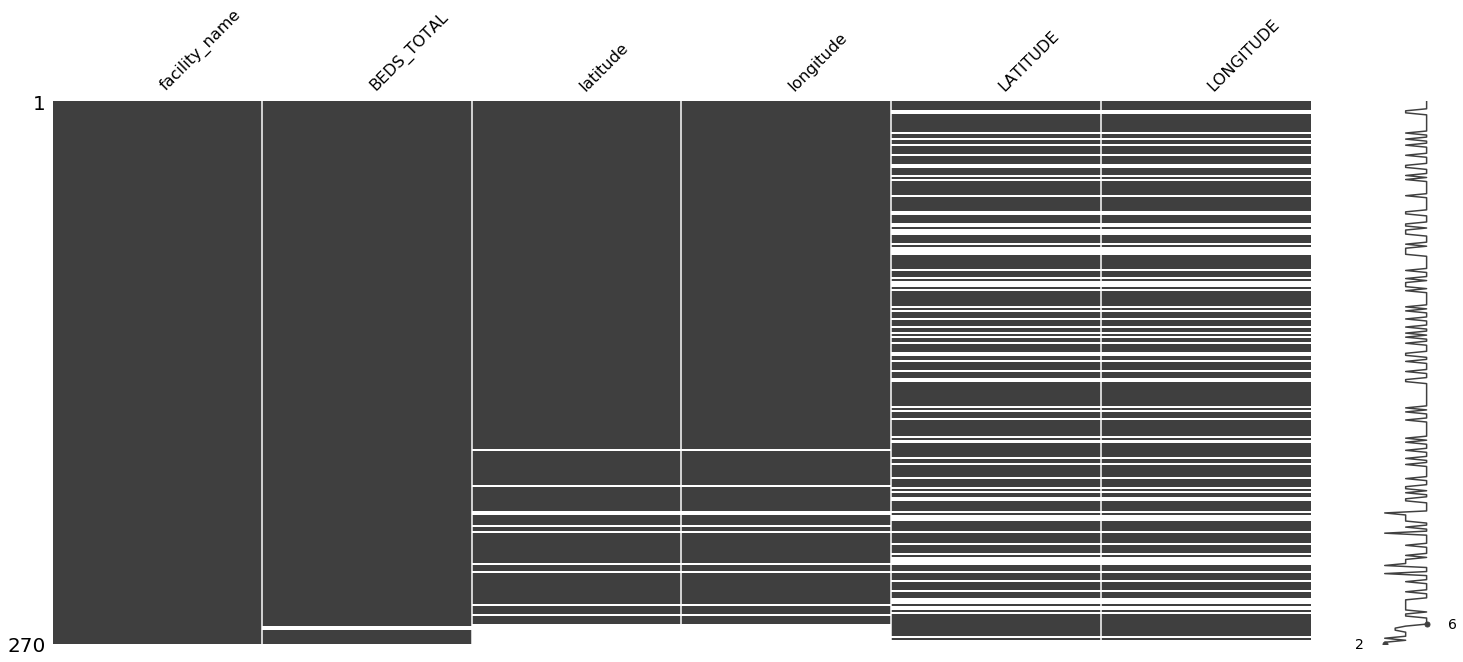

In [148]:
import missingno as msno

msno.matrix(complete.reset_index()[['facility_name', 'BEDS_TOTAL', 'latitude', 'longitude', 'LATITUDE', 'LONGITUDE']])

---
# Map BC and LTCs


In [48]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [49]:
street_map = gpd.read_file('../data/bc-health-authorities.geojson')

In [130]:
geometry = [Point(xy) for xy in zip(complete.LATITUDE, complete.LONGITUDE)]
crs = {'init' : 'EPSG:4326'} # coordinate ref system

geo_df = gpd.GeoDataFrame(complete,
                         crs = crs,
                         geometry = geometry)

geo_df[['facility_name', 'outbreak_status','POSTAL', 'LATITUDE', 'LONGITUDE', 'geometry']].head()

//anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,facility_name,outbreak_status,POSTAL,LATITUDE,LONGITUDE,geometry
0,langley lodge,yes,V3A5M9,49.101567,-122.657303,POINT (49.102 -122.657)
1,lynn valley care centre,yes,V7J1Z8,49.334077,-123.044696,POINT (49.334 -123.045)
2,haro park centre,yes,V6E3Y5,49.285628,-123.128450,POINT (49.286 -123.128)
3,royal arch masonic home,yes,V5S4C7,49.213533,-123.028804,POINT (49.214 -123.029)
4,berkley care centre,yes,V7H3A5,49.312135,-123.006047,POINT (49.312 -123.006)


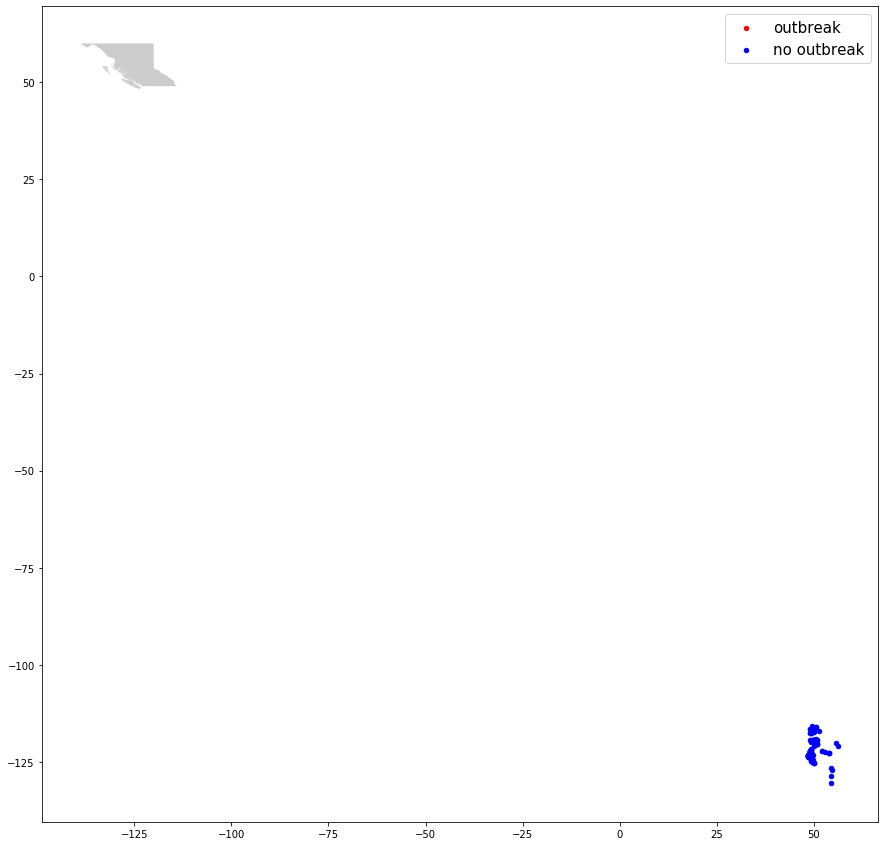

In [127]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')

# geo_df.plot(ax = ax, markersize = 20,
#                                                color = 'red', marker = 'o',
#                                                label = "outbreak")
            
geo_df[geo_df['outbreak_status'] == 'yes'].plot(ax = ax, markersize = 20,
                                               color = 'red', marker = 'o',
                                               label = "outbreak")
geo_df[geo_df['outbreak_status'] == 'no'].plot(ax = ax, markersize = 20,
                                               color = 'blue', marker = 'o',
                                               label = "no outbreak")
plt.legend(prop={'size' : 15})

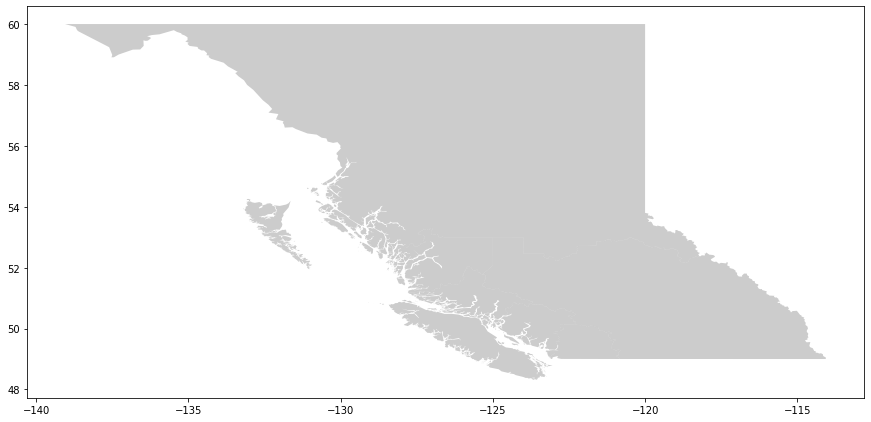

In [52]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')